#### Загрузите данные о вероятности развития сердечного приступа

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Разделите данные на обучающую и тестовую выборки в соотношении 80% / 20% без перемешивания

In [2]:
target = "HeartDisease"
y = df['output']
x = df.drop(columns='output')

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Постройте следующие модели классификации:
1. случайное предсказание (подбрасывание кубика)
2. логистическая регрессия (LogisticRegression)
3. метод опорных векторов с линейным ядром (SVC(kernel='linear'))
4. метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
5. метод k ближайших соседей (KNeighborsClassifier с двумя классами)

In [4]:
import numpy as np

#подбрасывание кубика
y_pred_train_1 = np.random.randint(0, 2, x_train.shape[0])
y_pred_test_1 = np.random.randint(0, 2, x_test.shape[0])

In [5]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(x_train, y_train)

y_pred_train_2 = model_lr.predict(x_train)
y_pred_test_2 = model_lr.predict(x_test)

In [6]:
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear', probability = True)
svc_linear.fit(x_train, y_train)

y_pred_train_3 = svc_linear.predict(x_train)
y_pred_test_3 = svc_linear.predict(x_test)

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

y_pred_train_4 = lda.predict(x_train)
y_pred_test_4 = lda.predict(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

y_pred_train_5 = knc.predict(x_train)
y_pred_test_5 = knc.predict(x_test)

#### Задание 4
На основе метрики accuracy сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте accuracy на нём, затем на тестовом датасете и тоже посчитайте accuracy. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

In [9]:
from sklearn.metrics import accuracy_score

acc_train_2 = accuracy_score(y_train, y_pred_train_2)
acc_test_2 = accuracy_score(y_test, y_pred_test_2)

print('Логистическая регрессия')
print(f'Тренировочная точность - {acc_train_2}\nТестовая точность - {acc_test_2}')

acc_train_3 = accuracy_score(y_train, y_pred_train_3)
acc_test_3 = accuracy_score(y_test, y_pred_test_3)

print('')
print('Метод опорных векторов с линейным ядром')
print(f'Тренировочная точность - {acc_train_3}\nТестовая точность - {acc_test_3}')

acc_train_4 = accuracy_score(y_train, y_pred_train_4)
acc_test_4 = accuracy_score(y_test, y_pred_test_4)

print('')
print('Метод линейного дискриминантного анализа')
print(f'Тренировочная точность - {acc_train_4}\nТестовая точность - {acc_test_4}')

acc_train_5 = accuracy_score(y_train, y_pred_train_5)
acc_test_5 = accuracy_score(y_test, y_pred_test_5)

print('')
print('Метод k ближайших соседей')
print(f'Тренировочная точность - {acc_train_5}\nТестовая точность - {acc_test_5}')

Логистическая регрессия
Тренировочная точность - 0.8429752066115702
Тестовая точность - 0.8852459016393442

Метод опорных векторов с линейным ядром
Тренировочная точность - 0.8636363636363636
Тестовая точность - 0.9016393442622951

Метод линейного дискриминантного анализа
Тренировочная точность - 0.8388429752066116
Тестовая точность - 0.9016393442622951

Метод k ближайших соседей
Тренировочная точность - 0.7396694214876033
Тестовая точность - 0.7213114754098361


#### Задание 5
Сделайте вывод о применимости каждой модели на основе метрики F1-score (чем выше её значение, тем модель эффективнее)

In [10]:
from sklearn.metrics import f1_score

f1_1 = f1_score(y_test, y_pred_test_1)
f1_2 = f1_score(y_test, y_pred_test_2)
f1_3 = f1_score(y_test, y_pred_test_3)
f1_4 = f1_score(y_test, y_pred_test_4)
f1_5 = f1_score(y_test, y_pred_test_5)

print(f'F1-score:\n\tПодбрасывание кубика: {f1_1}\n\tLogisticRegression: {f1_2}\n\tМетод опорных векторов с линейным ядром: {f1_3}\n\tМетод линейного дискриминантного анализа: {f1_4}\n\tМетод k ближайших соседей: {f1_5}')

F1-score:
	Подбрасывание кубика: 0.5161290322580646
	LogisticRegression: 0.8985507246376813
	Метод опорных векторов с линейным ядром: 0.9117647058823529
	Метод линейного дискриминантного анализа: 0.9142857142857143
	Метод k ближайших соседей: 0.7536231884057971


#### Задание 6
На одном графике постройте ROC-кривые для каждой модели. Визуально определите самую эффективную и наименее пригодную модели. Чем ROC-кривая выше, тем модель более эффективна.

In [11]:
y_pred_proba_1 = (np.zeros(x_test.shape[0]*2) + 0.5).reshape((-1, 2))

y_pred_proba_2 = model_lr.predict_proba(x_test) 
y_pred_proba_3 = svc_linear.predict_proba(x_test) 
y_pred_proba_4 = lda.predict_proba(x_test)
y_pred_proba_5 = knc.predict_proba(x_test) 

In [12]:
probs_1 = y_pred_proba_1[:, 1]
probs_2 = y_pred_proba_2[:, 1]
probs_3 = y_pred_proba_3[:, 1]
probs_4 = y_pred_proba_4[:, 1]
probs_5 = y_pred_proba_5[:, 1]

In [13]:
from sklearn.metrics import roc_curve

fpr_1, tpr_1, treshold_1 = roc_curve(y_test, probs_1)
fpr_2, tpr_2, treshold_2 = roc_curve(y_test, probs_2)
fpr_3, tpr_3, treshold_3 = roc_curve(y_test, probs_3)
fpr_4, tpr_4, treshold_4 = roc_curve(y_test, probs_4)
fpr_5, tpr_5, treshold_5 = roc_curve(y_test, probs_5)


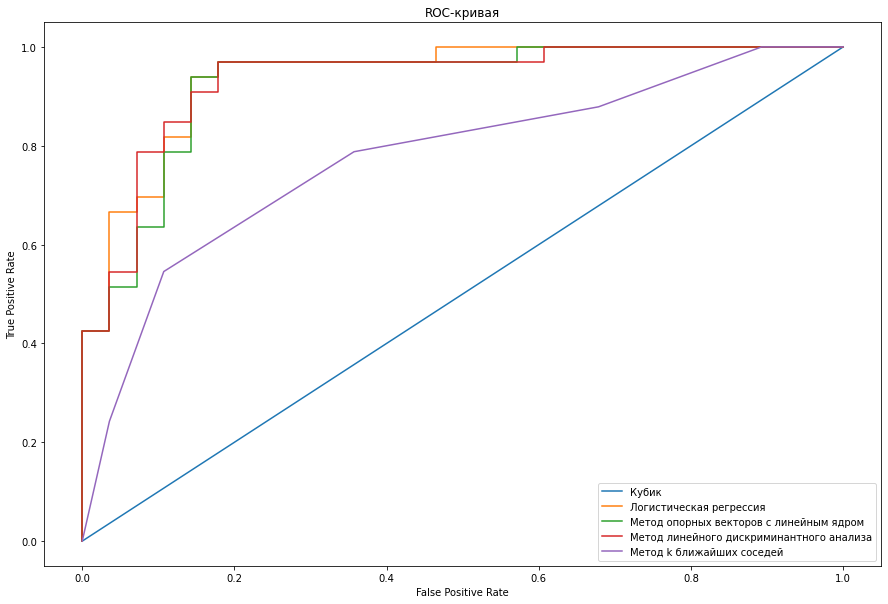

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(fpr_1, tpr_1, label='Кубик')
ax.plot(fpr_2, tpr_2, label='Логистическая регрессия')
ax.plot(fpr_3, tpr_3, label='Метод опорных векторов с линейным ядром')
ax.plot(fpr_4, tpr_4, label='Метод линейного дискриминантного анализа')
ax.plot(fpr_5, tpr_5, label='Метод k ближайших соседей')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC-кривая')
ax.legend()

#### Задание 7
Выведите соответствующие значения AUC (площадь под ROC - кривой) и расположите модели в порядке пригодности

In [15]:
from sklearn.metrics import auc

roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_2 = auc(fpr_2, tpr_2)
roc_auc_3 = auc(fpr_3, tpr_3)
roc_auc_4 = auc(fpr_4, tpr_4)
roc_auc_5 = auc(fpr_5, tpr_5)

roc_dict = {'Подбрасывание кубика':roc_auc_1, 'LogisticRegressio':roc_auc_2, 'Метод опорных векторов с линейным ядром':roc_auc_3, 'Метод линейного дискриминантного анализа':roc_auc_4, 'Метод k ближайших соседей':roc_auc_5}

In [16]:
sorted(roc_dict.items(), key=lambda x: x[1], reverse = True)

[('LogisticRegressio', 0.9393939393939394),
 ('Метод линейного дискриминантного анализа', 0.933982683982684),
 ('Метод опорных векторов с линейным ядром', 0.9274891774891775),
 ('Метод k ближайших соседей', 0.7754329004329004),
 ('Подбрасывание кубика', 0.5)]

## Задания для самостоятельного выполнения

1. Изобразите precision-recall кривую.
2. Оцените эффективность моделей при помощи показателя average precision.
3. Постройте другую классификационную модель и сравните ее с описанными по следующим метрикам: accuracy, precision, recall, ROC-AUC, F1. Сделайте вывод о том, какая модель наиболее удачная для данной задачи.

In [17]:
from sklearn.metrics import precision_recall_curve

precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, probs_1)
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, probs_2)
precision_3, recall_3, thresholds_3 = precision_recall_curve(y_test, probs_3)
precision_4, recall_4, thresholds_4 = precision_recall_curve(y_test, probs_4)
precision_5, recall_5, thresholds_5 = precision_recall_curve(y_test, probs_5)

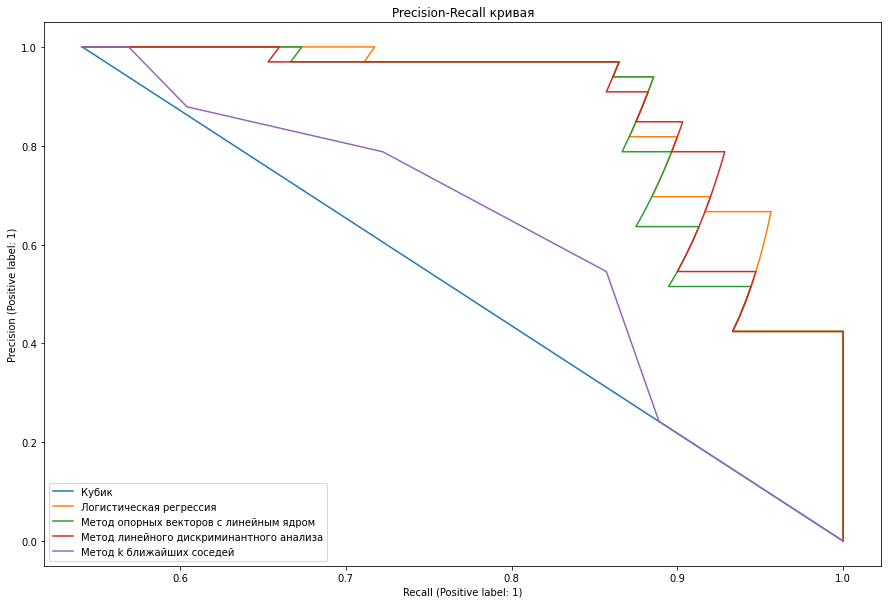

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.plot(precision_1, recall_1, label='Кубик')
ax.plot(precision_2, recall_2, label='Логистическая регрессия')
ax.plot(precision_3, recall_3, label='Метод опорных векторов с линейным ядром')
ax.plot(precision_4, recall_4, label='Метод линейного дискриминантного анализа')
ax.plot(precision_5, recall_5, label='Метод k ближайших соседей')

ax.set_xlabel('Recall (Positive label: 1)')
ax.set_ylabel('Precision (Positive label: 1)')
ax.set_title('Precision-Recall кривая')
ax.legend()

In [19]:
from sklearn.metrics import average_precision_score

average_precision_1 = average_precision_score(y_pred_test_1, y_test)
average_precision_2 = average_precision_score(y_pred_test_2, y_test)
average_precision_3 = average_precision_score(y_pred_test_3, y_test)
average_precision_4 = average_precision_score(y_pred_test_4, y_test)
average_precision_5 = average_precision_score(y_pred_test_5, y_test)

print(f'Average precision:\n\tПодбрасывание кубика: {average_precision_1}\n\tLogisticRegression: {average_precision_2}\n\tМетод опорных векторов с линейным ядром: {average_precision_3}\n\tМетод линейного дискриминантного анализа: {average_precision_5}\n\tМетод k ближайших соседей: {average_precision_5}')

Average precision:
	Подбрасывание кубика: 0.48061736642855923
	LogisticRegression: 0.8908897720373131
	Метод опорных векторов с линейным ядром: 0.8976084025264353
	Метод линейного дискриминантного анализа: 0.7329579952530771
	Метод k ближайших соседей: 0.7329579952530771


In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred_train_6 = dtc.predict(x_train)
y_pred_test_6 = dtc.predict(x_test)

In [21]:
acc_train_6 = accuracy_score(y_train, y_pred_train_6)
acc_test_6 = accuracy_score(y_test, y_pred_test_6)

print('DecisionTreeClassifier')
print(f'Тренировочная точность - {acc_train_6}\nТестовая точность - {acc_test_6}')

DecisionTreeClassifier
Тренировочная точность - 1.0
Тестовая точность - 0.7540983606557377


In [22]:
f1_6 = f1_score(y_pred_test_6, y_test)
print('F1=', f1_6)

F1= 0.7692307692307692


In [23]:
y_pred_proba_6 = dtc.predict_proba(x_test) 
probs_6 = y_pred_proba_6[:, 1]
fpr_6, tpr_6, treshold_6 = roc_curve(y_test, probs_6)

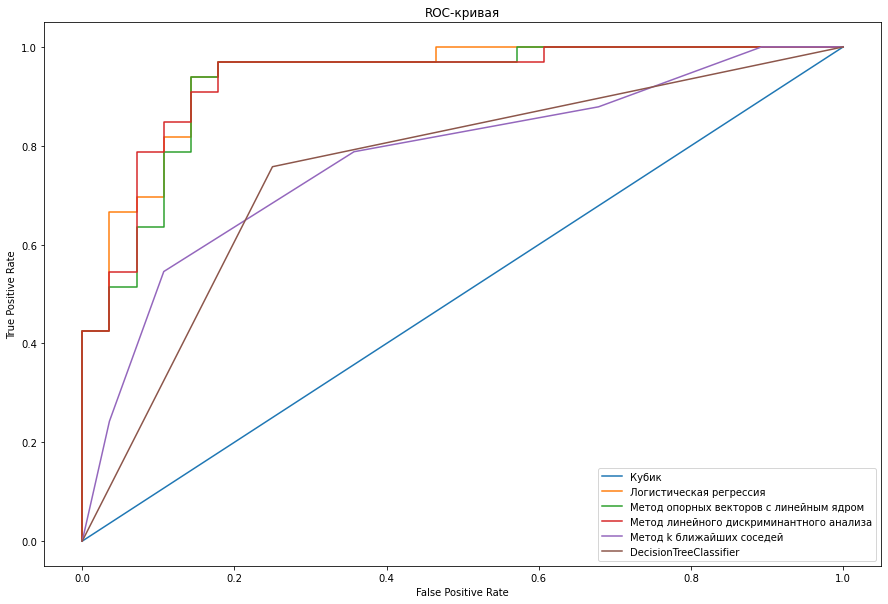

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(fpr_1, tpr_1, label='Кубик')
ax.plot(fpr_2, tpr_2, label='Логистическая регрессия')
ax.plot(fpr_3, tpr_3, label='Метод опорных векторов с линейным ядром')
ax.plot(fpr_4, tpr_4, label='Метод линейного дискриминантного анализа')
ax.plot(fpr_5, tpr_5, label='Метод k ближайших соседей')
ax.plot(fpr_6, tpr_6, label='DecisionTreeClassifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC-кривая')
ax.legend()

In [25]:
roc_auc_6 = auc(fpr_6, tpr_6)
print('roc_auc = ', roc_auc_6)

roc_auc =  0.7537878787878788


1. Что обозначают элементы confusion matrix?
2. По какой формуле рассчитывается метрика accuracy? Что она показывает?
The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.
(TP+TN)/(TP+TN+FP+FN)
3. Почему метрика accuracy непригодна при дисбалансе классов?
4. По какой формуле рассчитывается метрика precision? Что она показывает?
TP/TP+FP
5. По какой формуле рассчитывается метрика recall? Что она показывает?
TP/TP+FN
6. Какая метрика объединяет в себе precision и recall? По какой формуле она рассчитывается?
F1-score = 2PR/P+R
7. Какой показатель часто используется для сравнительного анализа нескольких моделей классификации?
8. Зависимость каких величин (при изменении порога) показывает ROC-кривая?

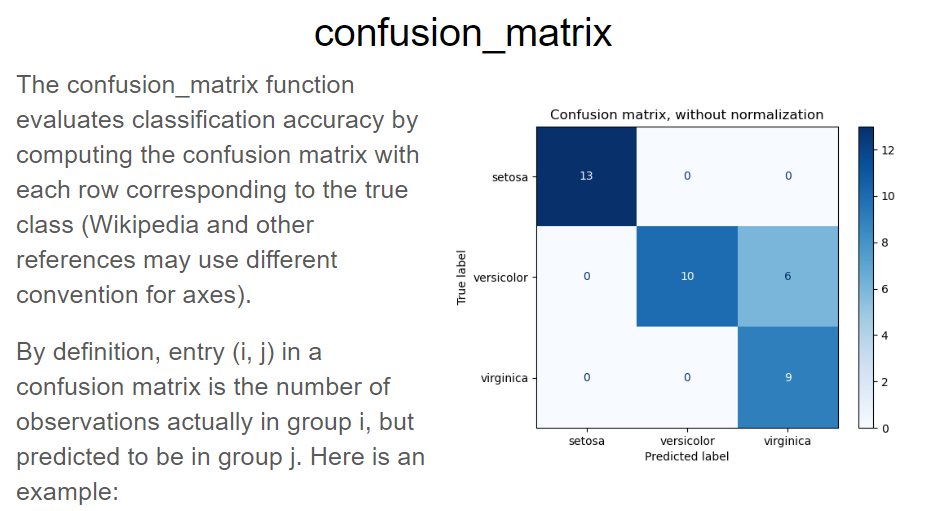